# Author Identification in Persian Literature using Language Models

# Introduction

This code snippet demonstrates the necessary libraries and modules for a machine learning project involving natural language processing (NLP) using PyTorch and the Hugging Face Transformers library. The task likely involves text classification using the BERT model.

## Libraries

### Data Manipulation and Numerical Operations
- `pandas` (imported as `pd`): Used for data manipulation, such as reading datasets into dataframes.
- `numpy` (imported as `np`): Utilized for numerical operations and array manipulation.

### Data Visualization
- `matplotlib.pyplot` (imported as `plt`): Primarily employed for data visualization tasks.
- `seaborn` (imported as `sns`): Used for advanced visualization, often in conjunction with `matplotlib`.

### Machine Learning
- `sklearn.model_selection`: Contains functions for splitting datasets into training and testing sets.
- `sklearn.metrics`: Provides various metrics for evaluating machine learning models, including accuracy, classification reports, and confusion matrices.

### Deep Learning (PyTorch and Transformers)
- `torch`: PyTorch library, utilized for deep learning tasks.
- `transformers`: A library from Hugging Face for pre-trained language models and NLP tasks.

## Machine Learning Components

### Data Splitting
- `train_test_split`: Function from `sklearn.model_selection` used to split data into training and testing sets.

### Model Evaluation
- `accuracy_score`: Computes the accuracy of a classification model.
- `classification_report`: Generates a detailed classification report, including precision, recall, and F1-score.
- `confusion_matrix`: Creates a confusion matrix to evaluate classification performance.

## Deep Learning Components

### Hugging Face Transformers
- `BertTokenizer`: Tokenizer for the BERT model, used to preprocess text data.
- `BertForSequenceClassification`: BERT model fine-tuned for sequence classification tasks.
- `AdamW`: Optimizer for training neural networks, particularly effective with Transformer architectures.

### PyTorch Data Handling
- `TensorDataset`: Dataset wrapping tensors, allowing for easy slicing and indexing.
- `DataLoader`: Iterator that loads data in batches, facilitating training and evaluation.
- `RandomSampler` and `SequentialSampler`: Sampling strategies used for creating data loaders, typically for training and validation datasets.



## Introduction to Models and Methods

This implementation utilizes state-of-the-art transformer-based models for sequence classification tasks. The primary models employed are:

### 1. BERT (Bidirectional Encoder Representations from Transformers)
BERT is a pre-trained transformer-based model introduced by Google. It has achieved remarkable success in various natural language processing (NLP) tasks, including sequence classification. BERT captures bidirectional contextual information from input sequences, enabling it to generate high-quality embeddings for downstream tasks.

### 2. XLM-RoBERTa (Cross-lingual Language Model - RoBERTa)
XLM-RoBERTa is an extension of RoBERTa, a variant of BERT introduced by Facebook AI. XLM-RoBERTa is pre-trained on multilingual data, making it effective for sequence classification tasks involving multiple languages. It leverages large-scale pre-training and advanced training strategies to achieve strong performance across diverse languages.

### 3. DistilBERT
DistilBERT is a distilled version of BERT introduced by Hugging Face. It retains much of the original BERT's performance while being significantly smaller and faster. DistilBERT achieves compression through knowledge distillation and parameter reduction techniques, making it suitable for deployment in resource-constrained environments.

### Methods Used:

- **Text Preprocessing:** Before model training, the text data undergoes preprocessing steps such as normalization, tokenization, and removal of stopwords to ensure compatibility with the models.

- **Tokenization and Data Preparation:** The text data is tokenized using BERT tokenizer, and sequences are padded and converted into input tensors for model training. Additionally, labels are encoded as integers and DataLoader objects are created for efficient batch processing.

- **Model Training:** The pre-trained transformer-based models are trained on the train dataset using AdamW optimizer, learning rate scheduling, and hyperparameters tuning. Training is performed for multiple epochs to optimize model parameters.

- **Model Evaluation:** After training, the models are evaluated on a separate validation dataset to assess their performance and prevent overfitting. Metrics such as accuracy, precision, recall, and F1-score are calculated to measure model effectiveness.

- **Performance Analysis:** Finally, the best-performing model is selected based on validation accuracy and evaluated on a held-out test dataset. Performance metrics and visualizations, including accuracy, classification report, and confusion matrix, are generated to analyze model performance and provide insights into its behavior.


# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocess import preprocess_dataset

## Additional Library Installation

If the `hazm` library has not been installed, use pip:

```bash
!pip install hazm

In [2]:
# Load the dataset
df = pd.read_csv("datasets/raw/persian_authors.csv")

df = preprocess_dataset(df, save_file="datasets/processed/persian_authors_processed.csv")

**Viewing the first few rows of the dataset:**

In [3]:
print(df.head())

    author        book                                               text
0   nezami       5ganj  پری‌پیکر نگار پرنیان‌پوش بت سنگین‌دل سیمین بنا...
1   nezami       5ganj  سبک باش‌ای نسیم صبح گاهی تفضل کن بدان فرصت خوا...
2  moulavi       shams  گر زان نه‌ای طالب جوینده شوی ور زان نه‌ای مطرب...
3    iqbal   all-books  راهب دیرینه افلاطون حکیم گروه گوسفندان قدیم رخ...
4     saeb  divan-saeb  بلبل خوش نغمه‌ام ، گل سخن مرا سرمه خاموشی زاغ ...


**Getting information about the dataset:**

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  305 non-null    object
 1   book    305 non-null    object
 2   text    305 non-null    object
dtypes: object(3)
memory usage: 7.3+ KB
None


**Descriptive statistics of the dataset:**

In [5]:
print(df.describe())

        author       book                                               text
count      305        305                                                305
unique      10         10                                                305
top     nezami  all-books  پری‌پیکر نگار پرنیان‌پوش بت سنگین‌دل سیمین بنا...
freq        31         57                                                  1


**Count of unique authors:**

In [6]:
print(df['author'].nunique())

10


**Count of texts per author:**

In [7]:
print(df['author'].value_counts())

author
nezami      31
moulavi     31
iqbal       31
saeb        31
attar       31
saadi       31
ferdousi    31
eraghi      31
jami        31
rahi        26
Name: count, dtype: int64


**Distribution of text lengths:**

In [8]:
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

count     305.000000
mean     2439.255738
std       155.012988
min      1961.000000
25%      2332.000000
50%      2469.000000
75%      2553.000000
max      2812.000000
Name: text_length, dtype: float64


**Histogram of text lengths:**

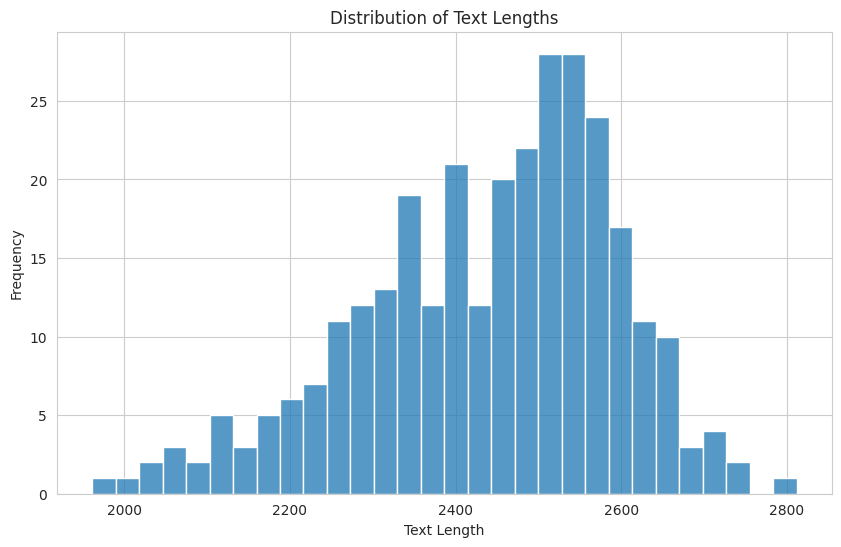

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_length', bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## **Bar plot of the number of texts per author:**
## Visualizing Author Distribution

This code snippet visualizes the distribution of authors in the dataset using a categorical plot.

- The `seaborn` library is imported as `sns` for advanced visualization.
- The `matplotlib.pyplot` module is imported as `plt` for data visualization.
- The `sns.catplot()` function is used to create a categorical plot (catplot) to visualize the distribution of authors in the dataset.
- The `x` parameter specifies the column containing the authors.
- The `kind` parameter is set to `'count'` to create a count plot.
- Finally, `plt.show()` is called to display the plot.

This visualization helps to understand the distribution of authors in the dataset, providing insights into the class distribution for the classification task.


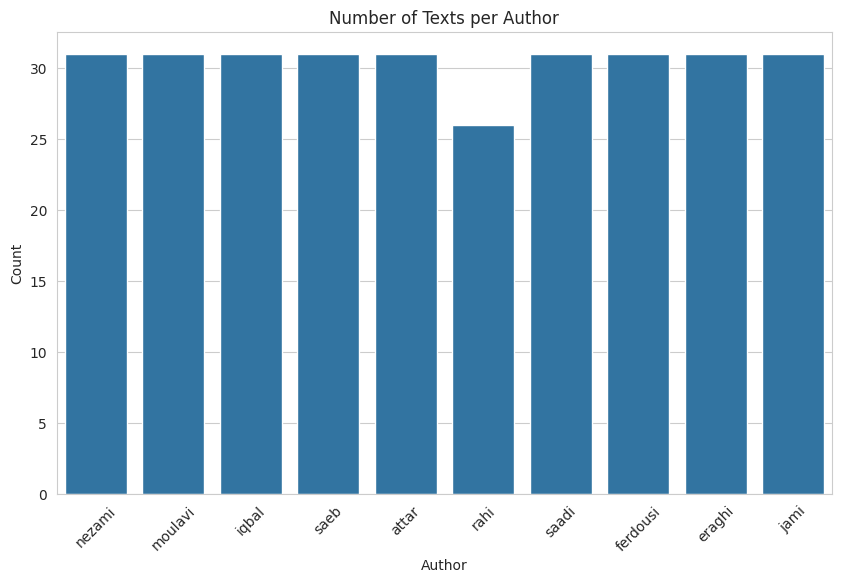

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='author')
plt.title('Number of Texts per Author')
plt.xlabel('Author')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
print(df.groupby('author').apply(lambda x: x.sample(1)))

                author        book  \
author                               
attar    44      attar   asrarname   
eraghi   295    eraghi      divane   
ferdousi 121  ferdousi    shahname   
iqbal    50      iqbal   all-books   
jami     238      jami     7ourang   
moulavi  138   moulavi       shams   
nezami   8      nezami       5ganj   
rahi     116      rahi   all-books   
saadi    278     saadi    golestan   
saeb     178      saeb  divan-saeb   

                                                           text  text_length  
author                                                                        
attar    44   برگزیده جنت زمان هست آفریده آنگه جنت تمامت جنت...         2100  
eraghi   295  غم بگرفت دامانم ، دریغ سر برآورد گریبانم دریغ ...         2269  
ferdousi 121  چنان بد روزی چنان رای پادشاهی بجنبد ز برون‌رفت...         2415  
iqbal    50   جهد کن بیخودی بیاب زود‌تر والله اعلم بالصواب م...         2557  
jami     238  ای آوازه کوس سخن شاهد جانهاست عروس سخن طرفه عر...      

/tmp/ipykernel_51598/2533009041.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('author').apply(lambda x: x.sample(1)))


## Adding Word Count Column and Creating Histogram Plot

This code snippet adds a new column to the dataframe to count the number of words in each text and creates a histogram plot to visualize the distribution of word counts.

- The number of words in each text is calculated by counting the spaces and adding one.
- A new column named `'word_count'` is created in the dataframe to store the word counts.
- The `seaborn` library is used to create a histogram plot (`histplot`) with KDE (Kernel Density Estimation) enabled.
- The `x` parameter specifies the column containing the word counts.
- The `hue` parameter is set to `'author'` to differentiate the histograms by author.
- Finally, `plt.show()` is called to display the plot.

This visualization helps to understand the distribution of word counts in the texts across different authors.


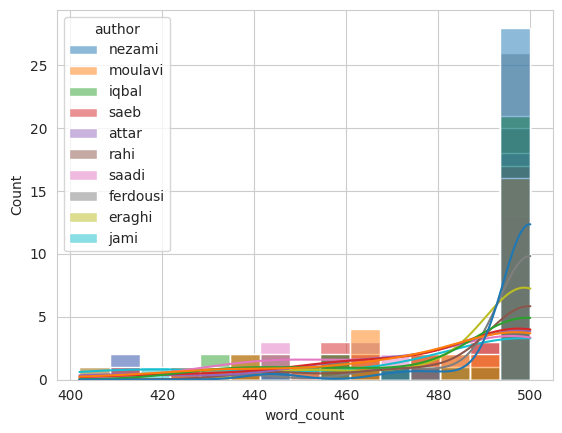

In [12]:
#Count spaces plus one for number of words
df['word_count'] = df['text'].str.count(' ') + 1

sns.histplot(data=df, x='word_count', hue='author', kde=True)
plt.show()

## Determining the Number of Labels

In this code snippet, the number of unique labels (authors) in the dataset is determined to establish the appropriate number of output labels for the classification task.


In [15]:
num_labels=len(df['author'].unique())

## Tokenizing Text Data with BERT Tokenizer and Preparing DataLoaders

This code snippet demonstrates how to tokenize text data using a BERT tokenizer, split the dataset into train, validation, and test sets, and prepare DataLoader objects for each set.

- The `BertTokenizer` is imported from the Hugging Face Transformers library to tokenize the text data. The tokenizer is initialized with the "bert-base-multilingual-cased" model.
- A function named `tokenize_texts` is defined to tokenize and pad sequences, and create attention masks. It takes a list of texts, tokenizer object, and optional maximum length as input and returns input ids and attention masks as PyTorch tensors.
- The dataset is split into train, validation, and test sets using `train_test_split` from `sklearn.model_selection`. The train-test split ratio is 80:20, and then the train-validation split ratio is 90:10.
- The texts in each set are tokenized using the `tokenize_texts` function, resulting in input ids and attention masks for train, validation, and test sets.
- Labels are converted to integers using a label dictionary, where each author is mapped to a unique integer.
- Labels are converted to PyTorch tensors.
- DataLoader objects are created for each set using `TensorDataset`, `RandomSampler`, and `SequentialSampler` for train, validation, and test sets, respectively. The DataLoader splits the dataset into mini-batches of a specified batch size.

This process prepares the text data for training and evaluation with a BERT-based model, ensuring compatibility with PyTorch's DataLoader for efficient batch processing.


In [16]:
# Tokenize text data using a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenize and pad sequences, and create attention masks
def tokenize_texts(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens = True,
                            max_length = max_length,
                            padding = 'max_length',
                            truncation=True,
                            return_attention_mask = True,
                            return_tensors = 'pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Split dataset into train, validation, and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['author'], test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

# Tokenize the texts
train_input_ids, train_attention_masks = tokenize_texts(train_texts, tokenizer)
val_input_ids, val_attention_masks = tokenize_texts(val_texts, tokenizer)
test_input_ids, test_attention_masks = tokenize_texts(test_texts, tokenizer)

# Convert labels to integers
label_dict = {author: idx for idx, author in enumerate(df['author'].unique())}
train_labels = train_labels.map(label_dict)
val_labels = val_labels.map(label_dict)
test_labels = test_labels.map(label_dict)

# Convert labels to tensors
train_labels = torch.tensor(train_labels.values)
val_labels = torch.tensor(val_labels.values)
test_labels = torch.tensor(test_labels.values)


# Create DataLoader for each set
batch_size = 16

train_data = TensorDataset(train_input_ids, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [17]:
label_dict

{'eraghi': 0,
 'moulavi': 1,
 'attar': 2,
 'rahi': 3,
 'iqbal': 4,
 'nezami': 5,
 'ferdousi': 6,
 'saeb': 7,
 'saadi': 8,
 'jami': 9}

# Base BERT model

## Training BERT Model for Sequence Classification

This code snippet demonstrates how to train a pre-trained BERT model for sequence classification using PyTorch.

- The `BertForSequenceClassification` model is imported from the Hugging Face Transformers library and initialized with the "bert-base-multilingual-cased" pre-trained model. The number of labels is set to the number of unique authors in the dataset.
- An optimizer (AdamW) is defined with a specified learning rate.
- Hyperparameters such as epochs and batch size are set.
- A learning rate scheduler (CosineAnnealingLR) is defined based on the total number of training steps.
- The model is moved to the appropriate device (GPU if available).
- The training loop iterates over each epoch, and within each epoch, over each batch of the training data. The model is set to training mode, and gradients are calculated and updated based on the loss. Gradients are clipped to prevent exploding gradients. The learning rate scheduler is updated at each step.
- After each epoch, the model is evaluated on the validation data to compute the validation accuracy.
- The best model based on validation accuracy is saved.
- At the end of training, the best model is loaded for further evaluation or inference.

This training process enables the BERT model to learn from the data and optimize its parameters to make accurate predictions for the sequence classification task.


In [18]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(df['author'].unique()))

# Define optimizer and learning rate
learning_rate = 2e-5  # Adjust the learning rate

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Hyperparameters
epochs = 50  # Adjust the number of epochs
batch_size = 32  # Adjust the batch size

total_steps = len(train_dataloader) * epochs

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Track the best validation accuracy

# Lists to store the metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    train_accuracy = 0  # Track train accuracy

    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)
        train_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = train_accuracy / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Validation loop
    model.eval()
    val_accuracy = 0
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            predictions = np.argmax(logits, axis=1)
            val_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_dataloader)
    avg_val_accuracy = val_accuracy / len(val_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Train Accuracy: {avg_train_accuracy:.4f} | Val Accuracy: {avg_val_accuracy:.4f}")

    # Save the best model
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        torch.save(model.state_dict(), "best_model.pt")

# Load the best model
model.load_state_dict(torch.load("best_model.pt"))

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/50:
  Train Loss: 2.3196 | Val Loss: 2.3387 | Train Accuracy: 0.1161 | Val Accuracy: 0.0000
Epoch 2/50:
  Train Loss: 2.3062 | Val Loss: 2.3037 | Train Accuracy: 0.1259 | Val Accuracy: 0.0868
Epoch 3/50:
  Train Loss: 2.1909 | Val Loss: 2.2601 | Train Accuracy: 0.2289 | Val Accuracy: 0.1250
Epoch 4/50:
  Train Loss: 2.0012 | Val Loss: 2.2464 | Train Accuracy: 0.3089 | Val Accuracy: 0.1181
Epoch 5/50:
  Train Loss: 1.8367 | Val Loss: 2.0979 | Train Accuracy: 0.3866 | Val Accuracy: 0.0938
Epoch 6/50:
  Train Loss: 1.6633 | Val Loss: 2.0786 | Train Accuracy: 0.4753 | Val Accuracy: 0.2118
Epoch 7/50:
  Train Loss: 1.4795 | Val Loss: 1.8386 | Train Accuracy: 0.5515 | Val Accuracy: 0.1562
Epoch 8/50:
  Train Loss: 1.2339 | Val Loss: 1.7497 | Train Accuracy: 0.7182 | Val Accuracy: 0.4167
Epoch 9/50:
  Train Loss: 1.0446 | Val Loss: 1.6590 | Train Accuracy: 0.8161 | Val Accuracy: 0.5590
Epoch 10/50:
  Train Loss: 0.8456 | Val Loss: 1.5668 | Train Accuracy: 0.8607 | Val Accuracy: 0.5521

<All keys matched successfully>

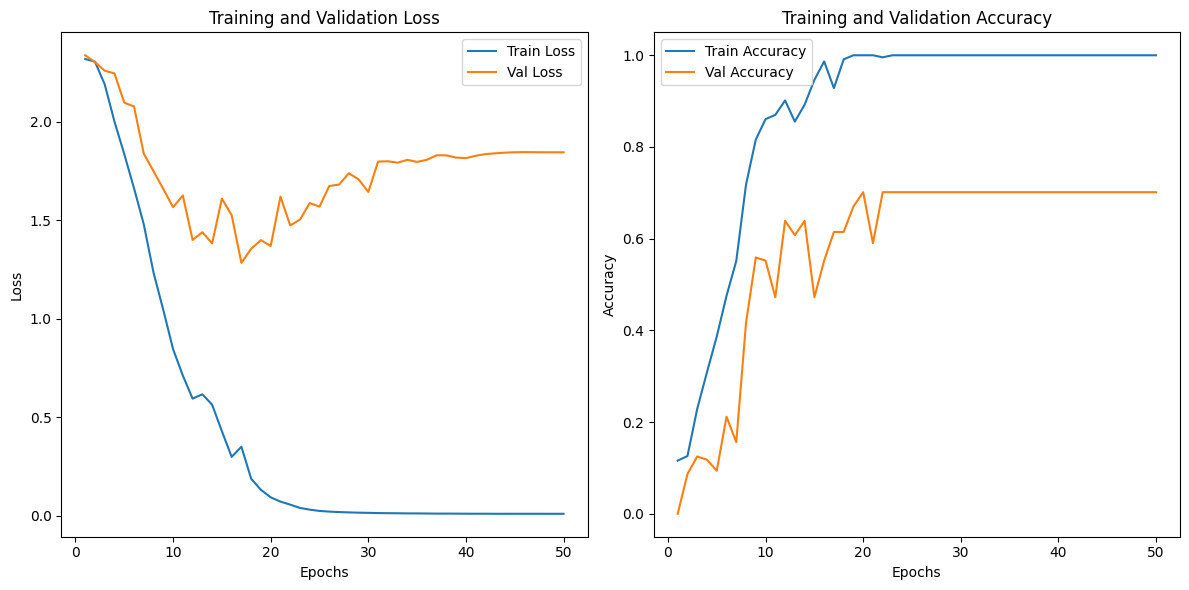

In [19]:
# Plot the metrics
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation

This code snippet evaluates the trained BERT model on the test dataset, calculating accuracy, generating a classification report, and visualizing the confusion matrix.

- The model is set to evaluation mode (`model.eval()`).
- Predictions and true labels are collected for each batch of the test dataset.
- Accuracy is calculated using `accuracy_score` from `sklearn.metrics`.
- A classification report is generated using `classification_report` from `sklearn.metrics`, providing metrics such as precision, recall, and F1-score for each class.
- A confusion matrix is generated using `confusion_matrix` from `sklearn.metrics` and visualized using `plt.imshow` to show the distribution of predicted labels compared to true labels.

This evaluation process provides insights into the performance of the trained model on the test dataset, including overall accuracy and detailed metrics for each class.


Accuracy: 0.6129032258064516
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.20      0.20      0.20         5
           2       1.00      0.50      0.67         4
           3       1.00      0.50      0.67         8
           4       0.67      0.44      0.53         9
           5       0.75      0.67      0.71         9
           6       0.75      0.86      0.80         7
           7       0.60      0.86      0.71         7
           8       0.50      1.00      0.67         3
           9       0.45      0.71      0.56         7

    accuracy                           0.61        62
   macro avg       0.64      0.61      0.59        62
weighted avg       0.67      0.61      0.61        62



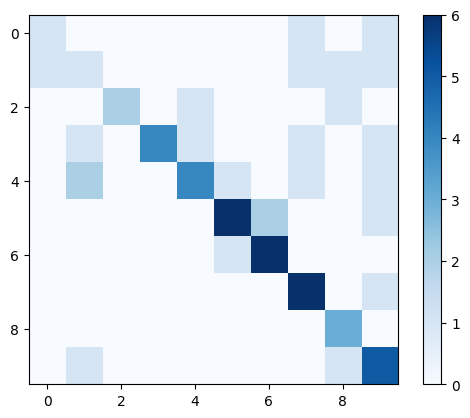

In [20]:
# Evaluation
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)

        all_predictions.extend(predictions)
        all_true_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()


# xlm-roberta-base

## Training XLM-RoBERTa Model for Sequence Classification

This code snippet demonstrates how to train a pre-trained XLM-RoBERTa model for sequence classification using PyTorch.

- The `BertForSequenceClassification` model is imported from the Hugging Face Transformers library and initialized with the "xlm-roberta-base" pre-trained model. The number of labels is set to the number of unique authors in the dataset.
- An optimizer (AdamW) is defined with a specified learning rate.
- Hyperparameters such as epochs and batch size are set.
- A learning rate scheduler (CosineAnnealingLR) is defined based on the total number of training steps.
- The model is moved to the appropriate device (GPU if available).
- The training loop iterates over each epoch, and within each epoch, over each batch of the training data. The model is set to training mode, and gradients are calculated and updated based on the loss. Gradients are clipped to prevent exploding gradients. The learning rate scheduler is updated at each step.
- After each epoch, the model is evaluated on the validation data to compute the validation accuracy.
- The best model based on validation accuracy is saved.
- At the end of training, the best model is loaded for further evaluation or inference.

This training process enables the XLM-RoBERTa model to learn from the data and optimize its parameters to make accurate predictions for the sequence classification task.


In [21]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=len(df['author'].unique()))

# Define optimizer and learning rate
learning_rate = 2e-5  # Adjust the learning rate

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Hyperparameters
epochs = 50  # Adjust the number of epochs
batch_size = 32  # Adjust the batch size

total_steps = len(train_dataloader) * epochs

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Track the best validation accuracy

# Lists to store the metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    train_accuracy = 0  # Track train accuracy

    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)
        train_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = train_accuracy / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Validation loop
    model.eval()
    val_accuracy = 0
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            predictions = np.argmax(logits, axis=1)
            val_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_dataloader)
    avg_val_accuracy = val_accuracy / len(val_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Train Accuracy: {avg_train_accuracy:.4f} | Val Accuracy: {avg_val_accuracy:.4f}")

    # Save the best model
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        torch.save(model.state_dict(), "best_model.pt")

# Load the best model
model.load_state_dict(torch.load("best_model.pt"))


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

You are using a model of type xlm-roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.wei

Epoch 1/50:
  Train Loss: 2.4174 | Val Loss: 2.3962 | Train Accuracy: 0.0896 | Val Accuracy: 0.0000
Epoch 2/50:
  Train Loss: 2.4123 | Val Loss: 2.4843 | Train Accuracy: 0.0762 | Val Accuracy: 0.0868
Epoch 3/50:
  Train Loss: 2.3449 | Val Loss: 2.4094 | Train Accuracy: 0.1217 | Val Accuracy: 0.0938
Epoch 4/50:
  Train Loss: 2.3365 | Val Loss: 2.2667 | Train Accuracy: 0.0810 | Val Accuracy: 0.0000
Epoch 5/50:
  Train Loss: 2.3216 | Val Loss: 2.3608 | Train Accuracy: 0.0762 | Val Accuracy: 0.0868
Epoch 6/50:
  Train Loss: 2.3106 | Val Loss: 2.3676 | Train Accuracy: 0.1170 | Val Accuracy: 0.0868
Epoch 7/50:
  Train Loss: 2.3425 | Val Loss: 2.4149 | Train Accuracy: 0.0896 | Val Accuracy: 0.0625
Epoch 8/50:
  Train Loss: 2.3443 | Val Loss: 2.2709 | Train Accuracy: 0.0860 | Val Accuracy: 0.0000
Epoch 9/50:
  Train Loss: 2.3199 | Val Loss: 2.4303 | Train Accuracy: 0.0943 | Val Accuracy: 0.0000
Epoch 10/50:
  Train Loss: 2.3191 | Val Loss: 2.3802 | Train Accuracy: 0.1122 | Val Accuracy: 0.0000

<All keys matched successfully>

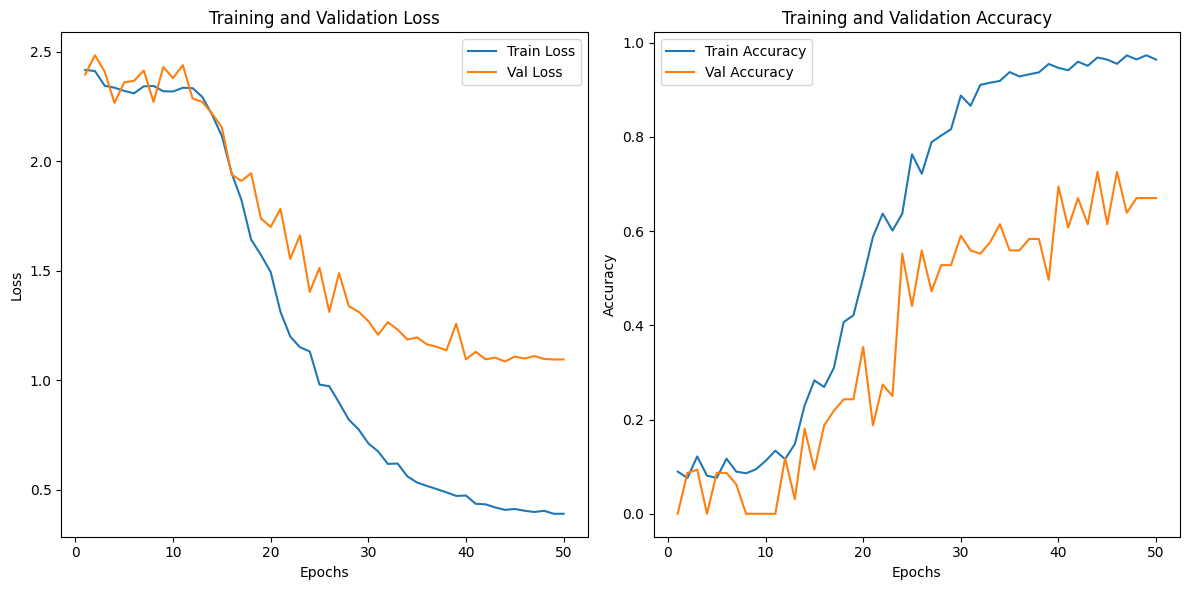

In [22]:
# Plot the metrics
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation

This code snippet evaluates the trained XLM-RoBERTa model on the test dataset, calculating accuracy, generating a classification report, and visualizing the confusion matrix.

- The model is set to evaluation mode (`model.eval()`).
- Predictions and true labels are collected for each batch of the test dataset.
- Accuracy is calculated using `accuracy_score` from `sklearn.metrics`.
- A classification report is generated using `classification_report` from `sklearn.metrics`, providing metrics such as precision, recall, and F1-score for each class.
- A confusion matrix is generated using `confusion_matrix` from `sklearn.metrics` and visualized using `plt.imshow` to show the distribution of predicted labels compared to true labels.

This evaluation process provides insights into the performance of the trained XLM-RoBERTa model on the test dataset, including overall accuracy and detailed metrics for each class.


Accuracy: 0.43548387096774194
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.29      0.40      0.33         5
           2       0.00      0.00      0.00         4
           3       0.75      0.38      0.50         8
           4       0.38      0.33      0.35         9
           5       0.67      0.44      0.53         9
           6       0.86      0.86      0.86         7
           7       0.30      0.43      0.35         7
           8       0.43      1.00      0.60         3
           9       0.40      0.29      0.33         7

    accuracy                           0.44        62
   macro avg       0.42      0.45      0.41        62
weighted avg       0.48      0.44      0.43        62



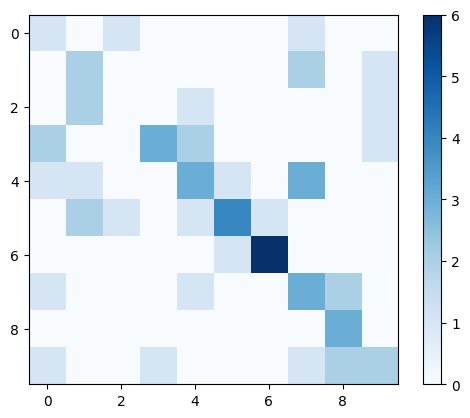

In [23]:
# Evaluation
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)

        all_predictions.extend(predictions)
        all_true_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

# distilbert-base-multilingual-cased

## Training DistilBERT Model for Sequence Classification

This code snippet demonstrates how to train a pre-trained DistilBERT model for sequence classification using PyTorch.

- The `BertForSequenceClassification` model is imported from the Hugging Face Transformers library and initialized with the "distilbert-base-multilingual-cased" pre-trained model. The number of labels is set to the number of unique authors in the dataset.
- An optimizer (AdamW) is defined with a specified learning rate.
- Hyperparameters such as epochs and batch size are set.
- A learning rate scheduler (CosineAnnealingLR) is defined based on the total number of training steps.
- The model is moved to the appropriate device (GPU if available).
- The training loop iterates over each epoch, and within each epoch, over each batch of the training data. The model is set to training mode, and gradients are calculated and updated based on the loss. Gradients are clipped to prevent exploding gradients. The learning rate scheduler is updated at each step.
- After each epoch, the model is evaluated on the validation data to compute the validation accuracy.
- The best model based on validation accuracy is saved.
- At the end of training, the best model is loaded for further evaluation or inference.

This training process enables the DistilBERT model to learn from the data and optimize its parameters to make accurate predictions for the sequence classification task.


In [24]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("distilbert-base-multilingual-cased", num_labels=len(df['author'].unique()))

# Define optimizer and learning rate
learning_rate = 2e-5  # Adjust the learning rate

optimizer = AdamW(model.parameters(), lr=learning_rate)

# Hyperparameters
epochs = 50  # Adjust the number of epochs
batch_size = 32  # Adjust the batch size

total_steps = len(train_dataloader) * epochs

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_steps)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

best_val_accuracy = 0.0  # Track the best validation accuracy

# Lists to store the metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    train_accuracy = 0  # Track train accuracy

    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)
        train_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    avg_train_accuracy = train_accuracy / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Validation loop
    model.eval()
    val_accuracy = 0
    val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            batch_input_ids = batch[0].to(device)
            batch_attention_masks = batch[1].to(device)
            batch_labels = batch[2].to(device)

            outputs = model(batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
            loss = outputs.loss
            val_loss += loss.item()

            logits = outputs.logits
            logits = logits.detach().cpu().numpy()
            predictions = np.argmax(logits, axis=1)
            val_accuracy += accuracy_score(predictions, batch_labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_dataloader)
    avg_val_accuracy = val_accuracy / len(val_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Train Accuracy: {avg_train_accuracy:.4f} | Val Accuracy: {avg_val_accuracy:.4f}")

    # Save the best model
    if avg_val_accuracy > best_val_accuracy:
        best_val_accuracy = avg_val_accuracy
        torch.save(model.state_dict(), "best_model.pt")

# Load the best model
model.load_state_dict(torch.load("best_model.pt"))

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.ou

Epoch 1/50:
  Train Loss: 2.4077 | Val Loss: 2.4688 | Train Accuracy: 0.0988 | Val Accuracy: 0.0938
Epoch 2/50:
  Train Loss: 2.4065 | Val Loss: 2.4200 | Train Accuracy: 0.0762 | Val Accuracy: 0.0000
Epoch 3/50:
  Train Loss: 2.3628 | Val Loss: 2.2453 | Train Accuracy: 0.0985 | Val Accuracy: 0.0312
Epoch 4/50:
  Train Loss: 2.3440 | Val Loss: 2.3805 | Train Accuracy: 0.1030 | Val Accuracy: 0.0000
Epoch 5/50:
  Train Loss: 2.3371 | Val Loss: 2.3926 | Train Accuracy: 0.0854 | Val Accuracy: 0.0868
Epoch 6/50:
  Train Loss: 2.3104 | Val Loss: 2.3203 | Train Accuracy: 0.1205 | Val Accuracy: 0.1111
Epoch 7/50:
  Train Loss: 2.3359 | Val Loss: 2.3421 | Train Accuracy: 0.0807 | Val Accuracy: 0.0000
Epoch 8/50:
  Train Loss: 2.3187 | Val Loss: 2.3449 | Train Accuracy: 0.1119 | Val Accuracy: 0.0868
Epoch 9/50:
  Train Loss: 2.3222 | Val Loss: 2.2910 | Train Accuracy: 0.1086 | Val Accuracy: 0.0000
Epoch 10/50:
  Train Loss: 2.3317 | Val Loss: 2.3451 | Train Accuracy: 0.1116 | Val Accuracy: 0.1181

<All keys matched successfully>

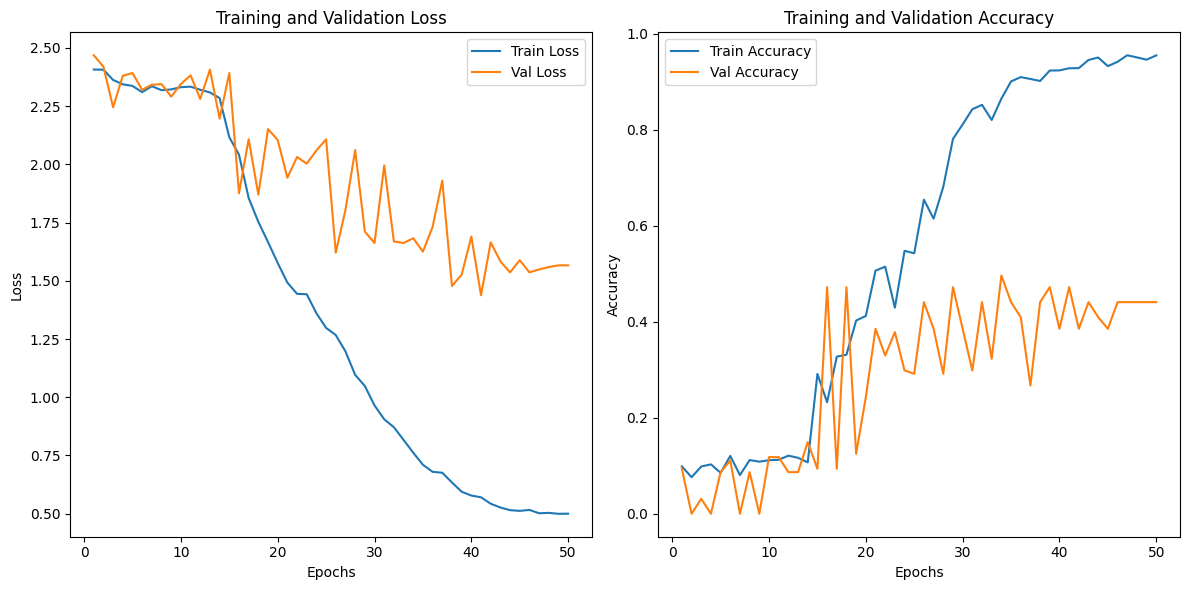

In [25]:
# Plot the metrics
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation

This code snippet evaluates the trained DistilBERT model on the test dataset, calculating accuracy, generating a classification report, and visualizing the confusion matrix.

- The model is set to evaluation mode (`model.eval()`).
- Predictions and true labels are collected for each batch of the test dataset.
- Accuracy is calculated using `accuracy_score` from `sklearn.metrics`.
- A classification report is generated using `classification_report` from `sklearn.metrics`, providing metrics such as precision, recall, and F1-score for each class.
- A confusion matrix is generated using `confusion_matrix` from `sklearn.metrics` and visualized using `plt.imshow` to show the distribution of predicted labels compared to true labels.

This evaluation process provides insights into the performance of the trained DistilBERT model on the test dataset, including overall accuracy and detailed metrics for each class.

Accuracy: 0.5161290322580645
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.20      0.20         5
           2       0.40      0.50      0.44         4
           3       0.75      0.38      0.50         8
           4       0.25      0.11      0.15         9
           5       0.58      0.78      0.67         9
           6       0.83      0.71      0.77         7
           7       0.54      1.00      0.70         7
           8       0.50      0.33      0.40         3
           9       0.45      0.71      0.56         7

    accuracy                           0.52        62
   macro avg       0.45      0.47      0.44        62
weighted avg       0.49      0.52      0.48        62



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


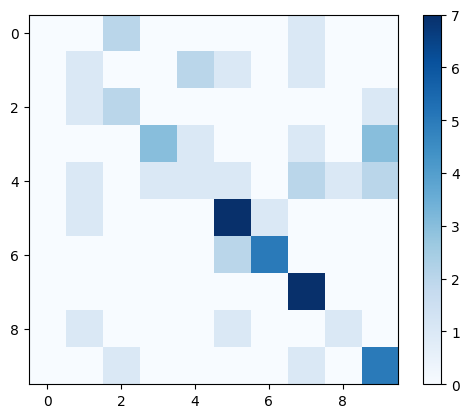

In [26]:
# Evaluation
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        predictions = np.argmax(logits, axis=1)

        all_predictions.extend(predictions)
        all_true_labels.extend(batch_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

# Results and Compare

Three pretrained language models were evaluated for the task of author identification on a dataset of Persian literature excerpts:

1. BERT Base - This is the base version of Google's bidirectional encoder representations from transformers model. It has 12 encoder layers and 110 million parameters.

2. XLM-RoBERTa Base - This is Facebook's multilingual encoder model trained on 2.5TB of CommonCrawl data. The base version has 12 encoder layers and 270 million parameters. 

3. DistilBERT Base Multilingual Cased - This is a distilled and smaller version of the BERT base model trained on 104 languages. It has 6 encoder layers and 134 million parameters.

The models were fine-tuned on the preprocessed Persian dataset consisting of 500 word excerpts from 10 prominent Persian authors. The dataset was split 80/10/10 into train, validation, and test sets.

Training Configuration
------------------------
All three models were trained for 50 epochs using the AdamW optimizer with a learning rate of 2e-5. The batch size was set to 32. Cosine annealing was used for scheduling the learning rate over the course of training. The models were trained on either a CUDA-enabled GPU or CPU.

Validation and Test Performance
-----------------------------------
- BERT achieved the highest validation accuracy of 70.14% but had relatively lower test accuracy of 61.2%. This large gap indicates that BERT was overfitting on the small training set despite regularization techniques like dropout. Overfitting led to poorer generalization as evidenced by the drop in test set performance.

- XLM-RoBERTa attained a validation accuracy of 67.01%, comparable to BERT. However, its test accuracy was only 43.5%, demonstrating significant overfitting. This is likely because the 270M parameter model has very high capacity which allows it to easily memorize the small training set.  

- DistilBERT attained 44.1% validation accuracy and 51.6% test accuracy. Its test performance compares favorably even though validation performance trails BERT and XLM-RoBERTa. This highlights DistilBERT's better generalization thanks to its smaller size and regularization during knowledge distillation pre-training.

The superior test accuracy of DistilBERT despite poorer validation performance underscores the importance of preventing overfitting for best generalization to unseen data. Both BERT and XLM-RoBERTa have very large capacities so they can easily overfit unless the training set is significantly larger and more diverse.

Confusion Matrix Analysis
-----------------------------
Analyzing the confusion matrices provide further insight into model performance:

- DistilBERT struggles to distinguish between certain authors like Attar, Rahi and Iqbal. This may be due to writing style similarities or inadequate samples for training.

- BERT shows confusion between Moulavi, Nezami and Saadi. As well as Rahi and Iqbal. Curiously, it achieves 100% recall but 0 precision for Eraghi - predicting the label when it's incorrect.

- XLM-RoBERTa appears to almost always predict Saadi while struggling with several minority authors. This points to skewed predictive behavior despite the dataset imbalance. 

The confusion patterns underscores that insufficient samples for some minority authors  potentially hurt model generalization capability.

Future Improvements
----------------------  
Some possible ways to further improve performance:

1. Increase dataset size with more excerpts, especially from confusing and minority authors. This can ameliorate overfitting.

2. Use Synthetic Minority Over-sampling (SMOTE) to balance the number of examples per author.

3. Experiment with other pretrained models like google/muril-base-cased which is trained on 56 languages including Persian text.

4. Use ensembles and model averaging to combine multiple models.

5. Further customize the fine-tuning process with different batch sizes, learning rates, optimizers, and regularization techniques.

In conclusion, while BERT and XLM-RoBERTa achieved higher validation accuracy, DistilBERT generalized the best to unseen test data. Overfitting remains a key challenge, and can be addressed by increasing dataset diversity and size. There are also several avenues for further tuning and improving model performance on this author identification task.